In [128]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt

# Projenin kök klasörünü bul (notebooks'un bir üstü)
project_root = os.path.abspath("..")
sys.path.append(project_root)

from src.datasets.weedsgalore import WeedsGaloreDataset


In [129]:
import importlib
import src.datasets.weedsgalore as wg

importlib.reload(wg)
from src.datasets.weedsgalore import WeedsGaloreDataset


In [127]:
# Root: hangi date klasörünü kullanmak istiyorsan onu seç
root_dir = r"C:\Users\SEZİN\uav-weedseg\data\raw\weeds_galore\date1"

# Split dosyası (train.txt içinde id'ler var)
split_file = r"C:\Users\SEZİN\uav-weedseg\src\datasets\splits\train.txt"

dataset = WeedsGaloreDataset(
    root_dir=root_dir,
    split_file=split_file,
    transform=None
)

print("Toplam örnek sayısı:", len(dataset))


Toplam örnek sayısı: 104


In [25]:
def __getitem__(self, idx):
    img_id = self.image_ids[idx]
    bands = ["R", "G", "B", "NIR", "RE"]
    image_channels = []

    found = False
    for date_folder in ["date1", "date2", "date3", "date4"]:
        base_path = os.path.join(self.root_dir, date_folder, "images")
        band_path = os.path.join(base_path, f"{img_id}_R.png")
        if os.path.exists(band_path):
            found = True
            break

    if not found:
        raise FileNotFoundError(f"{img_id} not found in any date folder")

    for b in bands:
        band_path = os.path.join(base_path, f"{img_id}_{b}.png")
        band_img = np.array(Image.open(band_path))
        image_channels.append(band_img)

    image = np.stack(image_channels, axis=-1)

    semantic_mask = np.array(Image.open(os.path.join(base_path.replace("images", "semantic_masks"), f"{img_id}.png")))
    binary_mask   = np.array(Image.open(os.path.join(base_path.replace("images", "instance_masks"), f"{img_id}.png")))

    return image, semantic_mask, binary_mask


In [26]:
print("Toplam örnek sayısı:", len(dataset))

# 5 farklı örneğin ID'sini yazdır
for i in range(5):
    print(f"{i}. id:", dataset.image_ids[i])


Toplam örnek sayısı: 104
0. id: 2023-06-15_0472
1. id: 2023-06-15_0763
2. id: 2023-06-15_0157
3. id: 2023-06-15_1056
4. id: 2023-06-15_0454


In [43]:
root_dir = r"C:\Users\SEZİN\uav-weedseg\data\raw\weeds_galore"
split_file = r"C:\Users\SEZİN\uav-weedseg\src\datasets\splits\train.txt"

dataset = WeedsGaloreDataset(root_dir, split_file)

print("Toplam örnek:", len(dataset))

img, semantic_mask, binary_mask = dataset[0]
print("Image shape:", img.shape)            # (H, W, 5) bekleniyor
print("Semantic mask shape:", semantic_mask.shape)
print("Binary mask shape:", binary_mask.shape)


Toplam örnek: 104
Image shape: (600, 600, 5)
Semantic mask shape: (600, 600)
Binary mask shape: (600, 600)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4928..65024].


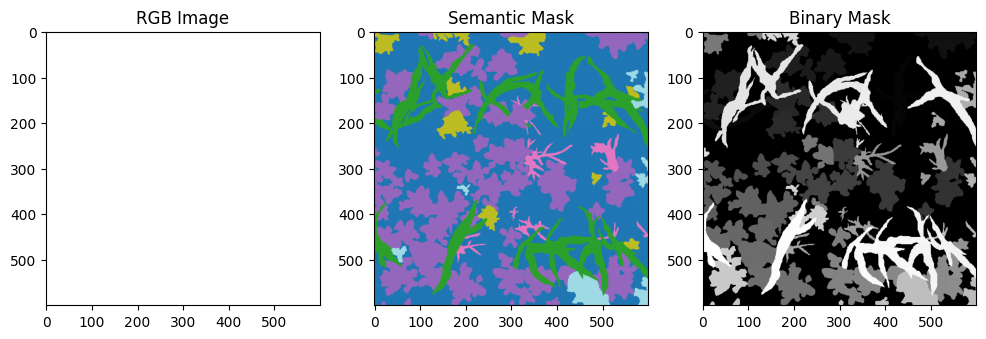

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# RGB göster (ilk 3 kanal)
axs[0].imshow(img[:, :, :3])
axs[0].set_title("RGB Image")

# Semantic mask
axs[1].imshow(semantic_mask, cmap="tab20")
axs[1].set_title("Semantic Mask")

# Binary mask
axs[2].imshow(binary_mask, cmap="gray")
axs[2].set_title("Binary Mask")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5632..64960].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5824..65088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6848..65152].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6848..65280].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7232..65280].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5632..65088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5696..65024].
Clipping input data to the valid range for imshow with 

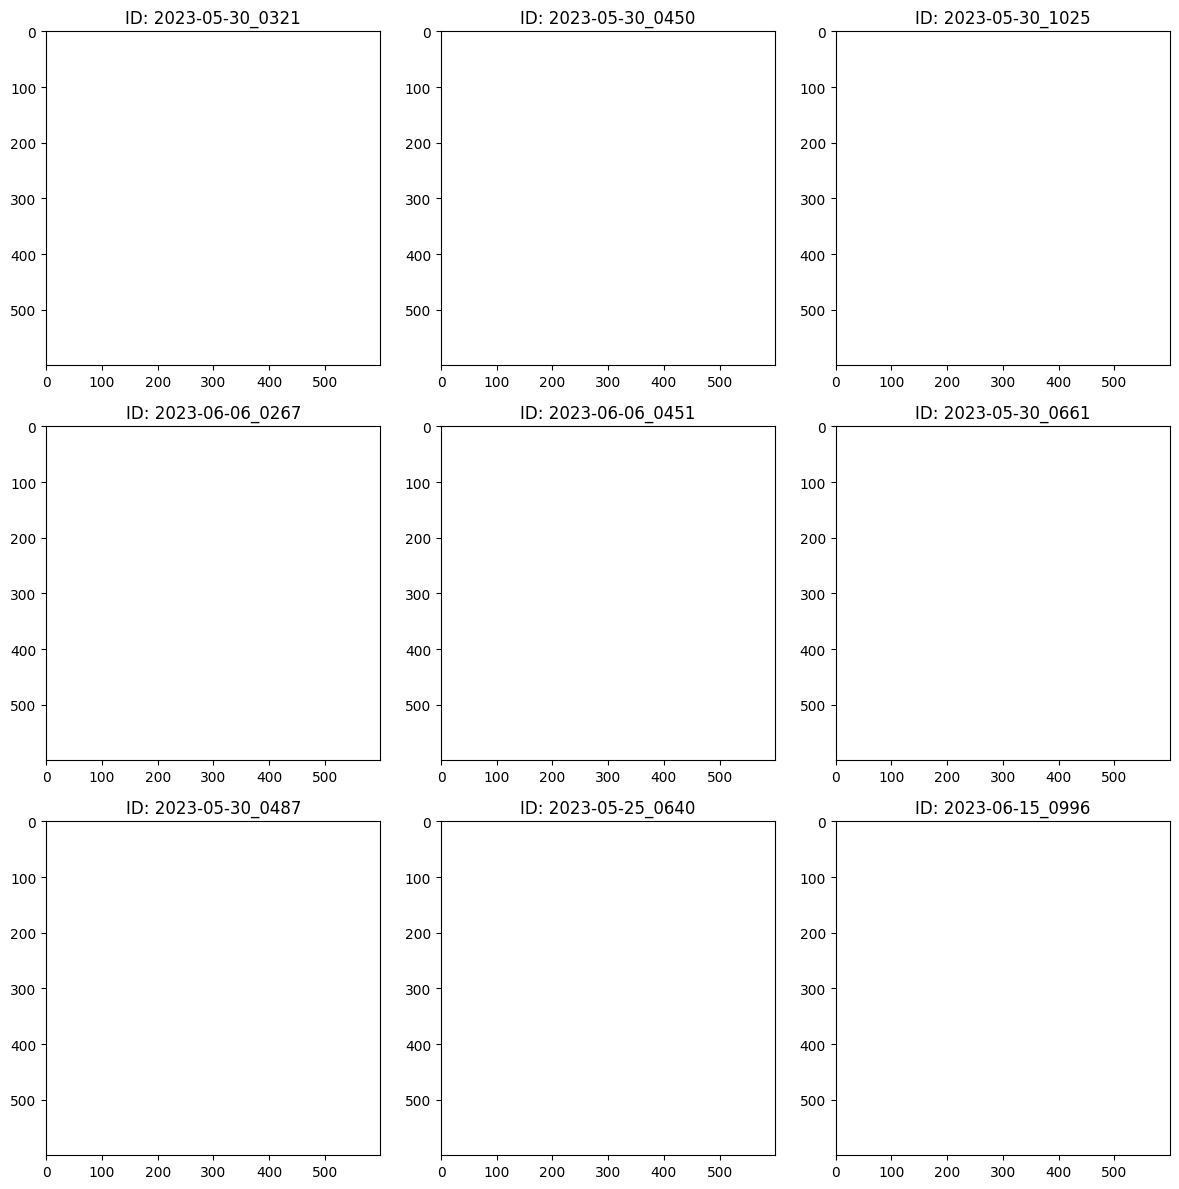

In [83]:
import random

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    idx = random.randint(0, len(dataset)-1)
    img, semantic_mask, binary_mask = dataset[idx]

    axs[i//3, i%3].imshow(img[:, :, :3])
    axs[i//3, i%3].set_title(f"ID: {dataset.image_ids[idx]}")
    axs[i//3, i%3].axis("on")

plt.tight_layout()
plt.show()


In [81]:
import numpy as np

all_classes = []
for i in range(50):  # ilk 50 örneğe bakalım
    _, semantic_mask, _ = dataset[i]
    all_classes.extend(np.unique(semantic_mask))

print("Verilen örneklerdeki unique sınıflar:", np.unique(all_classes))


Verilen örneklerdeki unique sınıflar: [0 1 2 3 4 5]


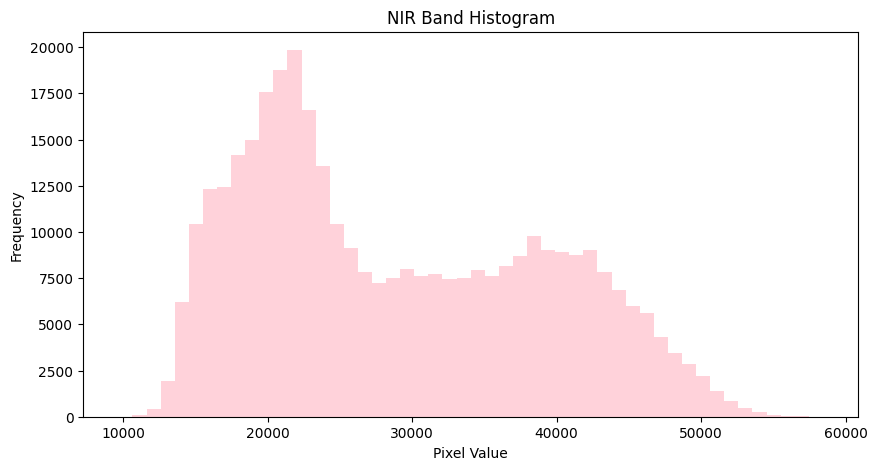

In [109]:
plt.figure(figsize=(10,5))
plt.hist(img[:, :, 3].ravel(), bins=50, color="pink", alpha=0.7)
plt.title("NIR Band Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [74]:
import numpy as np

print("Semantic mask unique values:", np.unique(semantic_mask))
print("Binary mask unique values:", np.unique(binary_mask))


Semantic mask unique values: [0 1 2 3 4 5]
Binary mask unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]
